# <p style="background-color:Purple; font-family:calibri; color:White; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Credit Card Usage Segmentation</p>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:120%; text-align:left">

<h3 align="left"><font color=purple>Problem:</font></h3>

Develop comprehensive unsupervised learning models to accurately segment credit card customers based on their spending and payment behaviors. By utilizing these models, the institution aims to improve targeted marketing, risk assessment, and overall customer relationship management.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h3 align="left"><font color=purple>Objectives:</font></h3>

This project focuses on developing unsupervised learning models for customer segmentation based on credit card usage data. The models aim to provide insights into distinct customer segments, improve credit risk assessment, and optimize marketing strategies. Deliverables include segmentation models, comprehensive data visualizations, and a comparative analysis of various algorithms.

<a id="import"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import math

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:purple ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

First of all, let's load the dataset:

In [2]:
# Read dataset
df = pd.read_csv("Customer Data.csv")

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<a id="overview"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:#CCCCFF'>Step 3.1 |</span><span style='color:purple'> Dataset Basic Information</span></b>

In [4]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __8950 entries__, ranging from index 0 to 8950.
    
    
* __Columns__: There are __18 columns__ in the dataset corresponding to various attributes of the customers and results of payments.
    
    
* __Data Types__:
    - Most of the columns (14 out of 18) are of the __float64__ data type.
    - Only the CUST_ID column is of the object data type.
    - Three columns (CASH_ADVANCE_TRX, PURCHASES_TRX, TENURE) are of the __int64__ data type.
    
    
* __Missing Values__: There appear to be any missing values in the dataset as each column has 314 non-null entries in the column of 'CREDIT_LIMIT' or 'MINIMUM_PAYMENTS'.

In [6]:
# find how much the rows and columns
df.shape

(8950, 18)

In [7]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

<a id="cat_statistics"></a>
# <b><span style='color:#CCCCFF'>Step 3.2 |</span><span style='color:purple'> Statistics Summary for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical feature:

In [8]:
df.describe(include='object')

,CUST_ID
count,8950
unique,8950
top,C19190
freq,1


In [9]:
# Remove CUST_ID as it’s doesn't contribute to clustering logic
df.drop('CUST_ID',axis=1,inplace=True)

<a id="num_statistics"></a>
# <b><span style='color:#CCCCFF'>Step 3.3 |</span><span style='color:purple'> Statistics Summary for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [10]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h3 align="left"><font color=purple>Numerical Features: Key Stats (Highlights)</font></h3>

* __`Balance`__: Mean ≈ 1,564, Range = 0 → 19,043
* __`Purchases`__: Mean ≈ 1,003, Range = 0 → 49,039
* __`One-off Purchases`__: Mean ≈ 592, Max = 40,761
* __`Installment Purchases`__: Mean ≈ 411, Max = 22,500
* __`Cash Advance`__: Mean ≈ 979, Max = 47,137
* __`Credit Limit`__: Mean ≈ 4,494, Range = 50 → 30,000
* __`Payments`__: Mean ≈ 1,733, Max = 50,721
* __`Minimum Payments`__: Mean ≈ 864, Max = 76,406 (with missing values)
* __`Tenure`__: Mostly 12 months

<a id="eda"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

<a id="num_statistics"></a>
# <b><span style='color:#CCCCFF'></span><span style='color:purple'> Pre-Clustering Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:#CCCCFF'>Step 4.1 |</span><span style='color:purple'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<a id="num_uni"></a>
### <b><span style='color:#CCCCFF'>Step 4.1.1 |</span><span style='color:purple'> Numerical Variables Univariate Analysis</span></b>  

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [12]:
# Define the continuous features
continuous_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 
        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

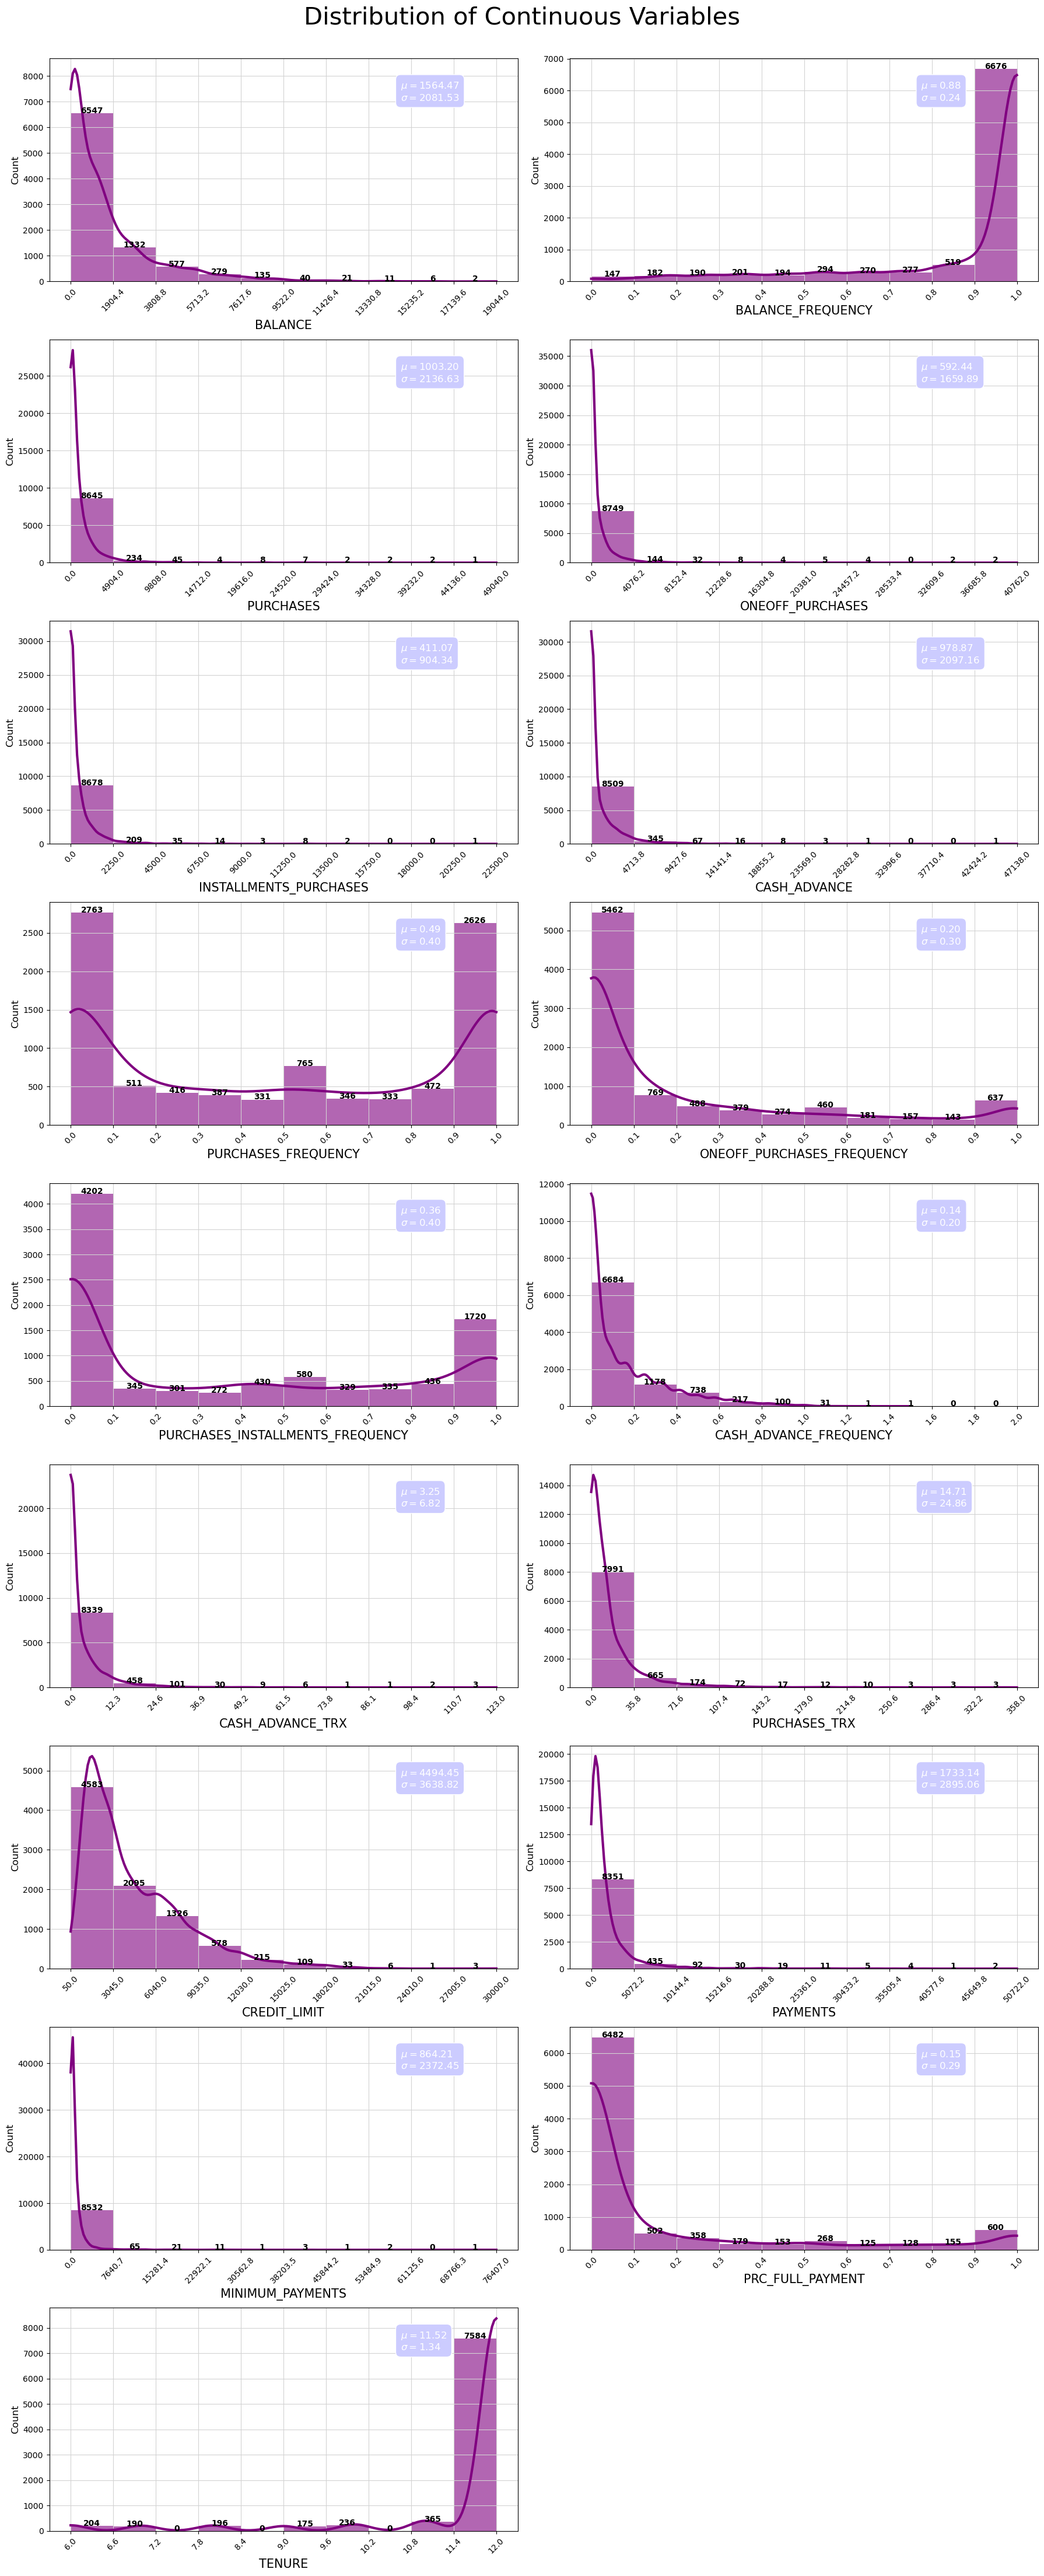

In [13]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Auto-calculate grid size (2 plots per col.)
n_features = len(df_continuous.columns)
ncols = 2
nrows = math.ceil(n_features / ncols)

# Set up the subplot grid (9 rows × 2 columns = 18 possible plots)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*9, nrows*5))

# Flatten axes for easier indexing
ax = ax.flatten()

# Loop to plot histograms
for i, col in enumerate(df_continuous.columns):
    values, bin_edges = np.histogram(
        df_continuous[col], 
        range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max()))
    )
    
    graph = sns.histplot(
        data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[i],
        edgecolor='none', color='purple', alpha=0.6, line_kws={'lw': 3}
    )
    ax[i].set_xlabel(col, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xticks(np.round(bin_edges, 1))
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
    ax[i].grid(color='lightgrey')
    
    # Annotate bars
    for p in graph.patches:
        ax[i].annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center', fontsize=10, fontweight="bold"
        )
    
    # Add mean and std box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[i].text(
        0.75, 0.9, textstr, transform=ax[i].transAxes, fontsize=12,
        verticalalignment='top', color='white',
        bbox=dict(boxstyle='round', facecolor='#CCCCFF', edgecolor='white', pad=0.5)
    )

# Remove any unused axes
for j in range(len(df_continuous.columns), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle('Distribution of Continuous Variables', fontsize=30)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Univariate Inferences:</font></h2>

* __BALANCE__: Most customers maintain low to moderate balances, but a few carry very large balances.
    
* __PURCHASES vs. ONEOFF_PURCHASES vs. INSTALLMENTS_PURCHASES__: Different spending patterns exist: some customers prefer one-off big transactions, others prefer installments.
    
* __CASH_ADVANCE__: Many customers never take cash advances (spike at 0), but a subset relies heavily on them.
    
* __CREDIT_LIMIT__: Distribution suggests tiered assignment by the bank (e.g., groups around 1500, 5000, 10000).
    
* __PAYMENTS__: While most customers pay moderately, some repay extremely high amounts, possibly high-spending but also responsible customers.

* __MINIMUM_PAYMENTS__: The high variance indicates different risk levels: some pay only the minimum, others much more.

* __PRC_FULL_PAYMENT__: Distribution skewed toward 0, meaning most customers don’t pay in full regularly.
____

The histograms reveal that customer behaviors are very heterogeneous:

* Most customers are low–moderate users.
* A small set of high-value customers dominate purchases and payments.
* Clear segments exist (installment users, cash advance users, one-off big spenders).

<a id="univariate"></a>
# <b><span style='color:#CCCCFF'>Step 4.2 |</span><span style='color:purple'> Bivariate Analysis</span></b>

<a id="cat_uni"></a>
### <b><span style='color:#CCCCFF'>Step 4.2.1 |</span><span style='color:purple'> Numerical Variables Bivariate Analysis</span></b>  

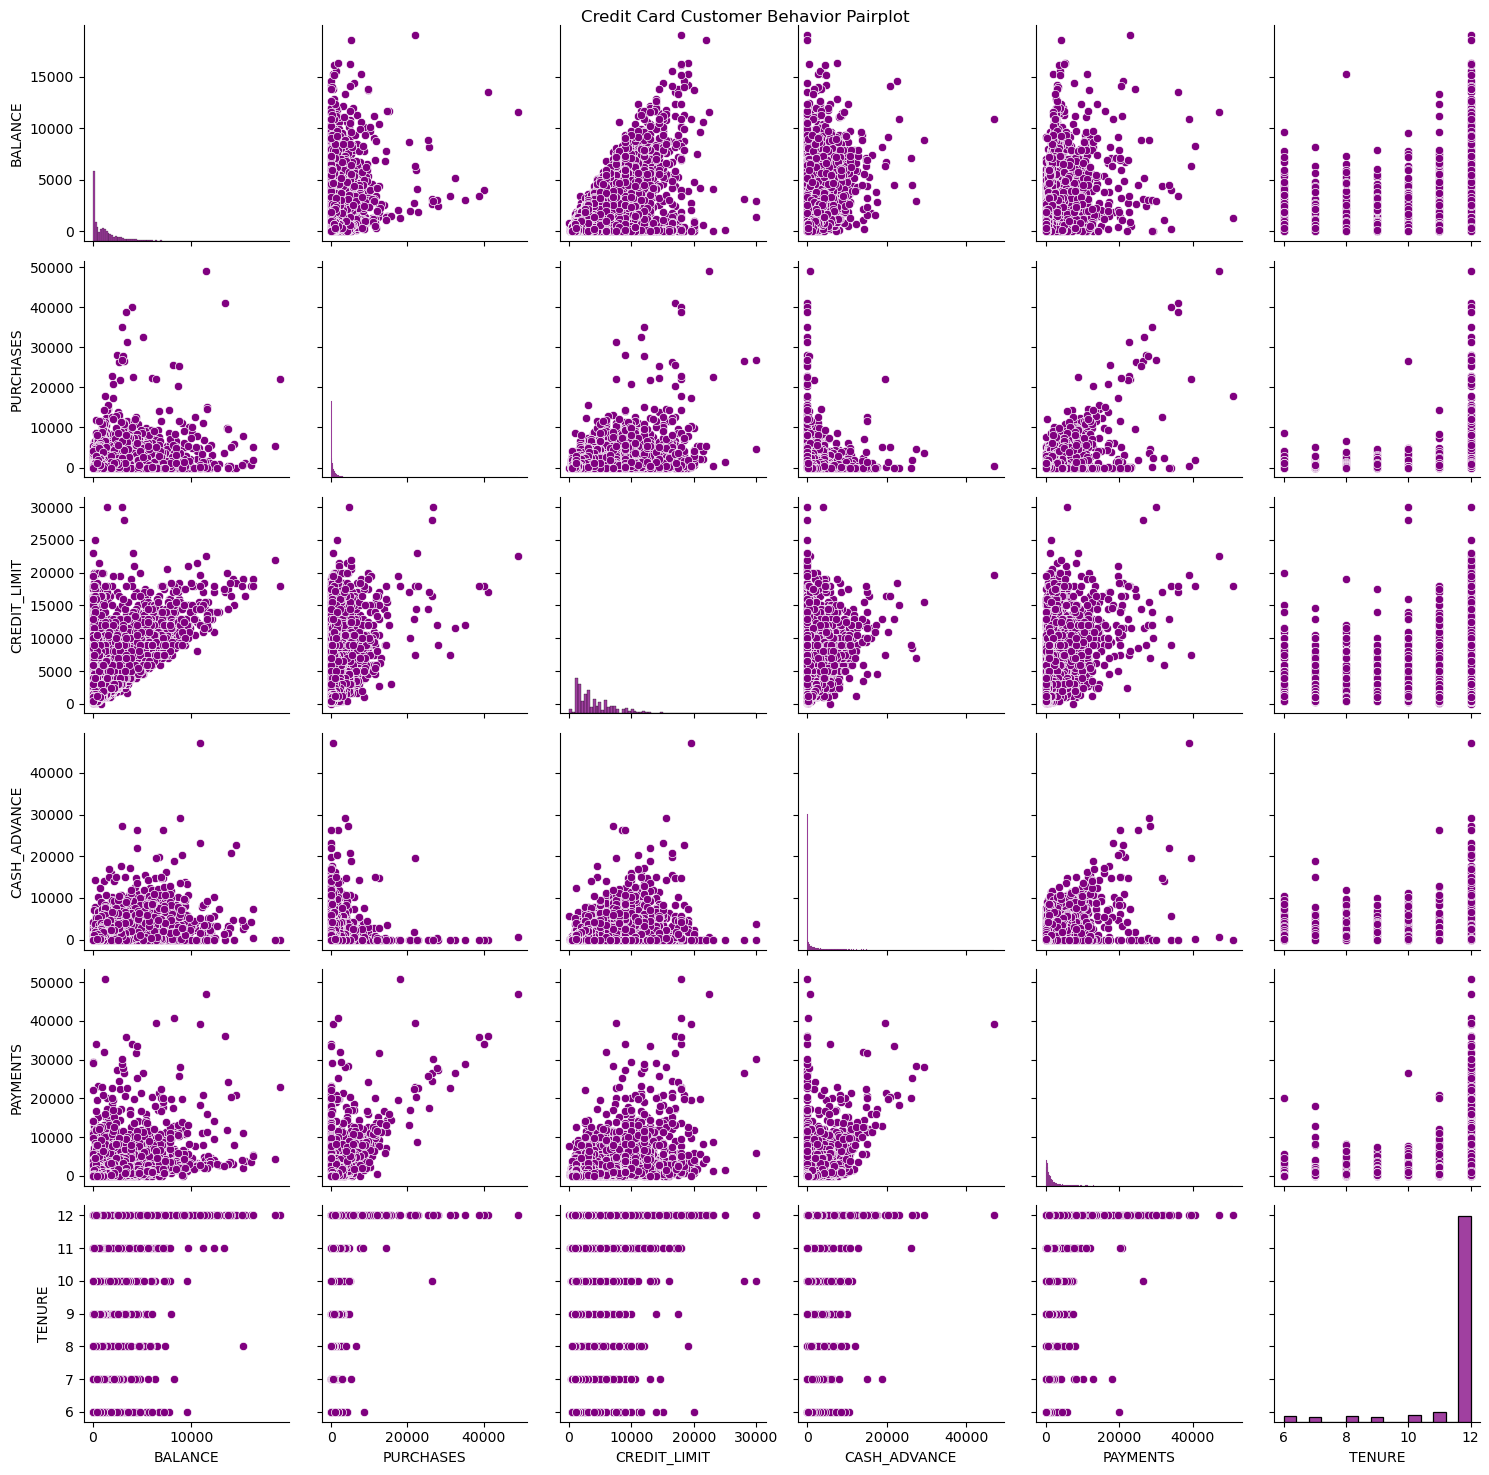

In [14]:
# Customer feature distribution
cols = ['BALANCE','PURCHASES','CREDIT_LIMIT','CASH_ADVANCE','PAYMENTS','TENURE']

# Set color palette
sns.set_palette(['purple'])

sns.pairplot(df[cols])
plt.suptitle("Credit Card Customer Behavior Pairplot")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Bivariate Inferences:</font></h2>

1. __Balance vs. Credit Limit__
   
* Customers with higher credit limits tend to have higher balances, but not always proportionally.
* Some customers have high limits but low balances, suggesting low utilization (possibly low-risk, conservative customers).
* Others max out their limits → risky or high-need customers.

2. __Purchases vs. Payments__
   
* Strong positive relationship: high spenders also make high payments.
* However, some customers show large purchases but low payments → they rely on credit rollovers, increasing default risk.
* A few show low purchases but very high payments, possibly making lump-sum repayments (e.g., clearing balance after inactivity).

3. __One-off vs. Installment Purchases__

* Customers cluster into:
    - One-off dominant spenders (big purchases, irregular).
    - Installment-heavy users (smaller but regular payments).
    - Balanced users (engage in both).
* This split can be used for behavioral segmentation (e.g., luxury shoppers vs. regular household spenders).

4. __Cash Advance vs. Payments__

* High cash advance users often also have high payments, but many sit at zero.
* Cash advance frequency shows a subset of customers who rely heavily on cash withdrawal, suggesting possible liquidity issues.

5. __Purchase Frequency vs. Purchase Amount__

* Some customers purchase frequently but with small amounts (everyday users).
* Others purchase rarely but with large one-off amounts (occasional big spenders).
* This separation is very useful for customer lifecycle marketing strategies.
____

These will highlight spending vs. repayment patterns, and help us detect segments like:

- High-spending but low-repayment customers (risky).
- Cash-advance dependent users.
- Luxury one-off spenders.
- Regular installment users.

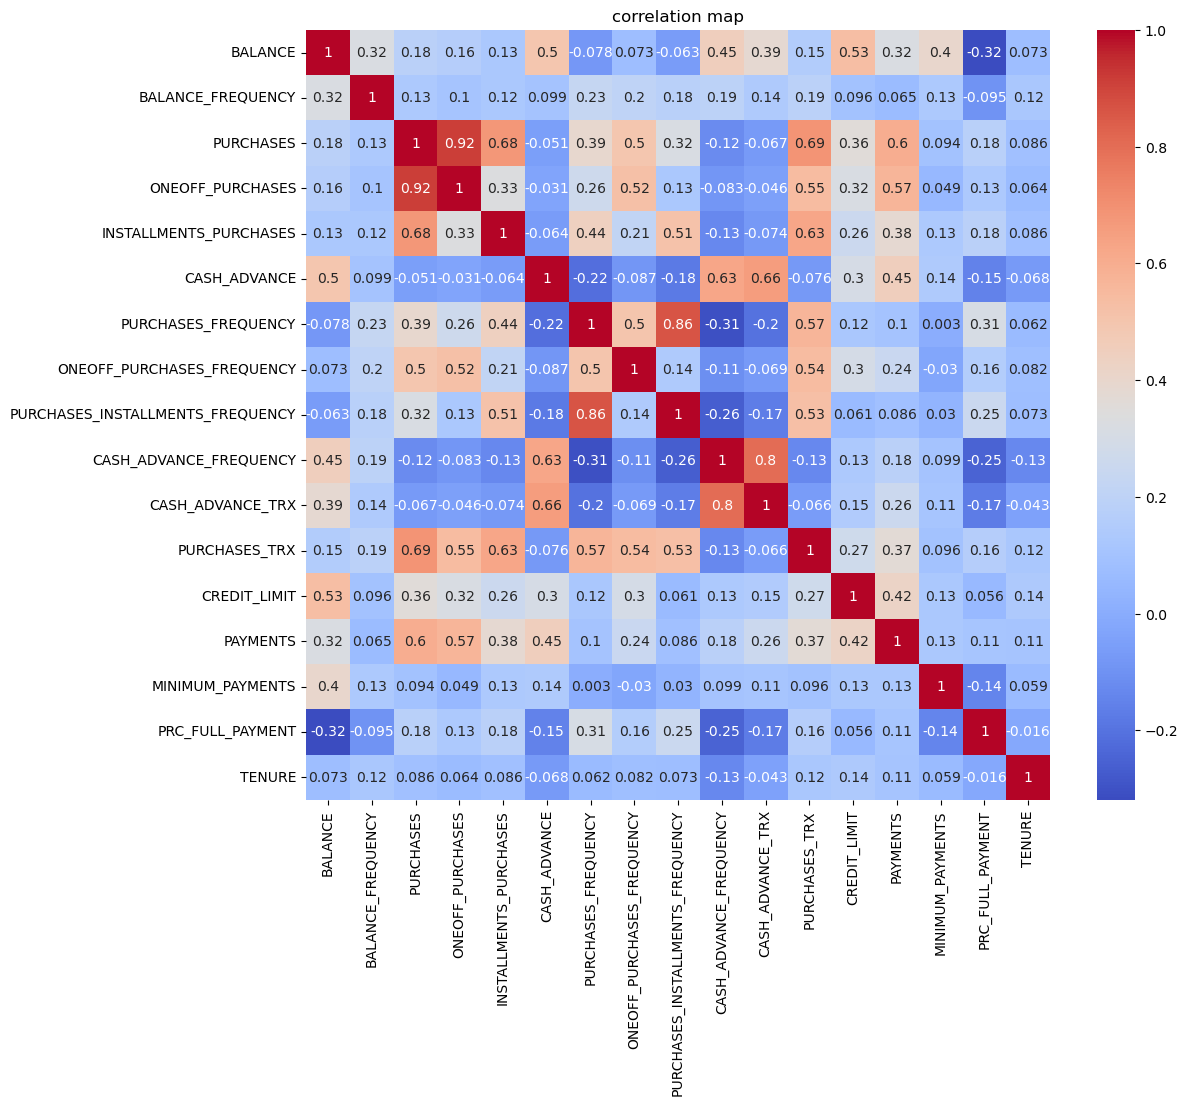

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('correlation map')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Analyze Insights:</font></h2>

1. __High Correlations__
* __PURCHASES & ONEOFF_PURCHASES (0.92)__
        Strong relationship, meaning total purchases are largely driven by one-off purchases.
* __PURCHASES & INSTALLMENTS_PURCHASES (0.68)__
        Purchases are also highly linked to installment-based purchases.
* __ONEOFF_PURCHASES & PURCHASES_TRX (0.55)__
        More one-off purchases → more purchase transactions.
* __CASH_ADVANCE & CASH_ADVANCE_TRX (0.66)__
        Higher cash advances are strongly linked with more cash advance transactions.
* __PURCHASES_FREQUENCY & ONEOFF_PURCHASES_FREQUENCY (0.5)__
        If someone purchases frequently, it’s highly likely they also make one-off purchases frequently.
________________________________________________________________________________________________________

2. __Moderate Correlations__
* __BALANCE & CREDIT_LIMIT (0.53) →__ Higher credit limits are associated with higher balances.
* __CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX (0.8) →__ Frequency of cash advances aligns with transaction counts.
* __PURCHASES & PAYMENTS (0.57) →__ Indicates responsible repayment when purchases increase.

_______________________________________________________________________________________________________

3. __Weak/Negative Correlations__
* __PRC_FULL_PAYMENT & BALANCE (-0.32) →__ Customers who pay the full balance tend to have lower outstanding balances.
* __PRC_FULL_PAYMENT & MINIMUM_PAYMENTS (-0.14) →__ Full payment behavior isn’t linked to minimum payment requirements.
* __BALANCE_FREQUENCY has very low correlation with other features →__ Doesn’t strongly impact purchases or payments.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Inferences:</font></h2>

1. Customers can be segmented into __installment-heavy vs. one-off purchase-heavy__ groups.

2. __Cash advance behavior__ is a separate pattern (strong within itself but weakly related to purchases).

3. __Full payment customers__ maintain lower balances and are financially healthier.

4. __Credit limit plays a role in balance accumulation,__ but not strongly tied to payment behavior.

<a id="preprocessing"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [16]:
# Checking Null Values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are missing values in our dataset. This is ideal as it means we have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

# <b><span style='color:#CCCCFF'>Step 5.1 |</span><span style='color:purple'> Missing Value Treatment</span></b>

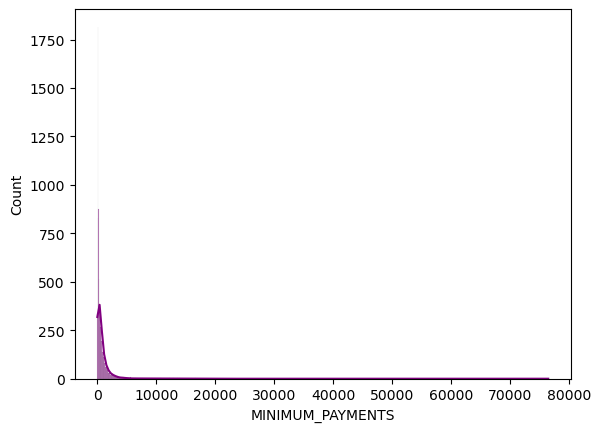

In [17]:
# Distribution of Minimum Payments
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Check skewness and outliers in MINIMUM_PAYMENTS— helps decide imputation method.

In [18]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Fill null values for better classification.

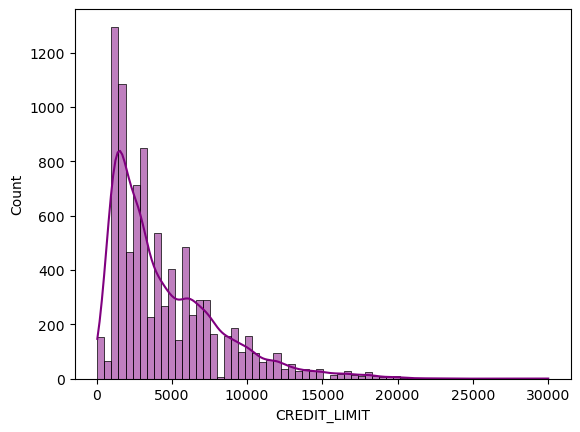

In [19]:
sns.histplot(df['CREDIT_LIMIT'],kde = True)
plt.show()

In [20]:
# Impute Other Missing Values
df.fillna(df.mean(), inplace=True)
df.shape

(8950, 17)

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Check multicollinearity and relationships that could affect clustering behavior.

# <b><span style='color:#CCCCFF'>Step 5.2 |</span><span style='color:purple'> Outlier</span></b>

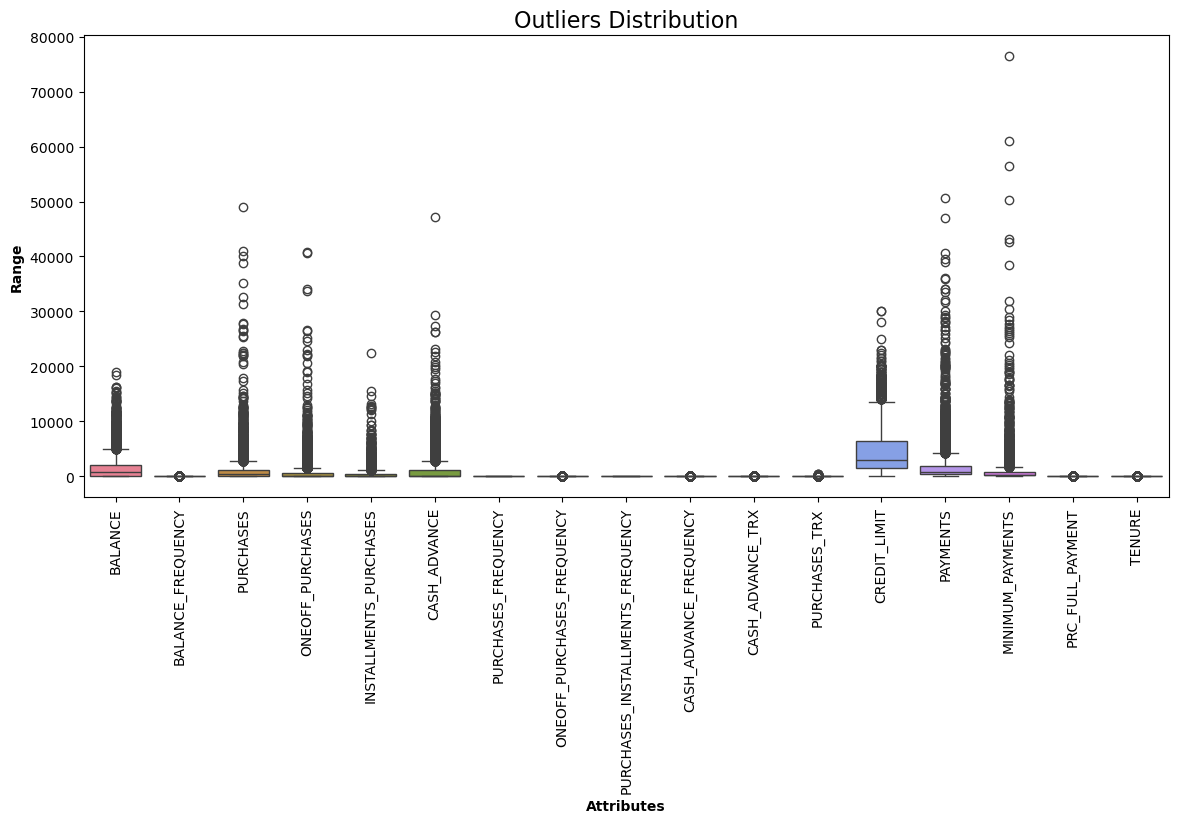

In [21]:
# Check for Outliers
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    plt.xticks(rotation=90)
    
show_boxplot(df)

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Some of our features have outliers, instead of removing them. I will use a robust scaler which isn't affected by outliers like standard scaler.

<a id="dt"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Modeling</p>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Reduce dimensionality for better visualization and efficient clustering without much info loss.

# <b><span style='color:#CCCCFF'>Step 6.1 |</span><span style='color:purple'> Scaling Data </span></b>

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# <b><span style='color:#CCCCFF'>Step 6.2 |</span><span style='color:purple'> Elbow & Silhouette Method </span></b>

In [23]:
# Elbow Method to find optimal clusters
inertia = []
silhouette=[]
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

  File "C:\Users\jatin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\jatin\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jatin\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jatin\anaconda3\Lib\subprocess.

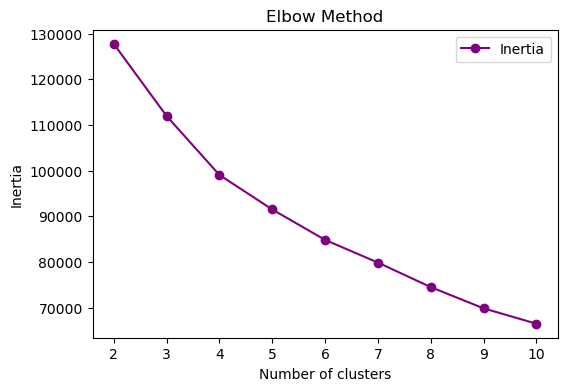

In [24]:
# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', label='Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()

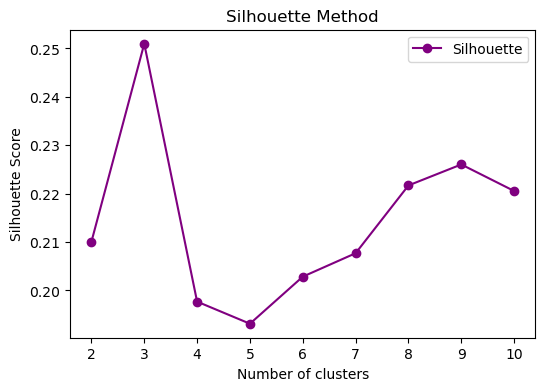

In [25]:
# Plot Silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K, silhouette, 'o-', color='purple', label='Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Analyze Insights:</font></h2>

1. __Highest Silhouette Score at k=3 (~0.25)__

The best clustering solution appears at 3 clusters, since it gives the highest average silhouette score (better separation between clusters and cohesion within clusters).

2. __Scores drop significantly after k=3__

At k=4 and k=5, the silhouette score decreases, meaning clusters overlap more and aren’t well separated.

3. __Slight improvement for k=8–9, but not better than k=3__

While the silhouette score improves for larger clusters, it never surpasses the score for k=3.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Infrences:</font></h2>

* __The optimal number of clusters is likely 3.__

* More than 3 clusters does not substantially improve separation, and fewer (k=2) gives a weaker structure.

* __The silhouette scores overall are __low (<0.3),__ suggesting that clusters are not very distinct → the dataset may have overlapping groups, or it might benefit from dimensionality reduction/feature engineering before clustering.

# <b><span style='color:#CCCCFF'>Step 6.3 |</span><span style='color:purple'> KMeans Clustering </span></b>

In [26]:
# Fit final KMeans (choose k based on plots, e.g., k=4)
kmeans = KMeans(n_clusters=4,random_state=5, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [27]:
# Cluster Profiling
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         894.768927           0.934715  1236.263333        593.995933   
1        4602.449658           0.968389   501.862982        320.188797   
2        1012.745945           0.789977   270.213240        210.016021   
3        3551.153761           0.986879  7681.620098       5095.878826   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    642.541696    209.816318             0.885255   
1                    181.759123   4521.509581             0.287832   
2                     60.464108    597.051145             0.170249   
3                   2587.208264    653.638891             0.946418   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

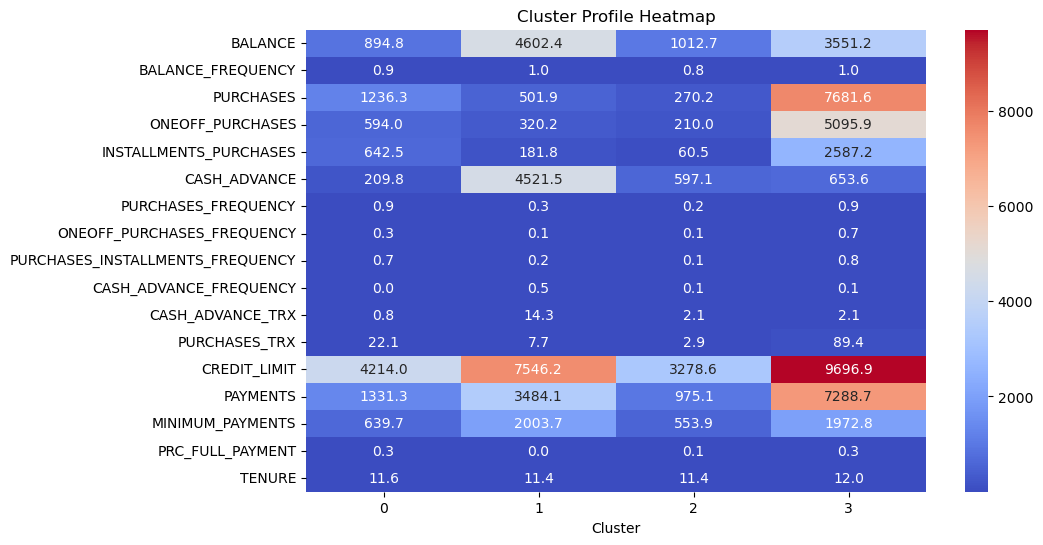

In [28]:
# Heatmap of cluster profiles
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Cluster Profile Heatmap')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Insights:</font></h2>

Cluster 0 = Low spend, low balance users (safe customers).

Cluster 1 = Heavy one-off spenders, pay in full.

Cluster 2 = Cash-advance reliant, risky customers.

Cluster 3 = High limit, high spending, high repayment customers (VIPs).

# <b><span style='color:#CCCCFF'>Step 6.4 |</span><span style='color:purple'> Principal Component Analysis  </span></b>

In [29]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

In [30]:
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

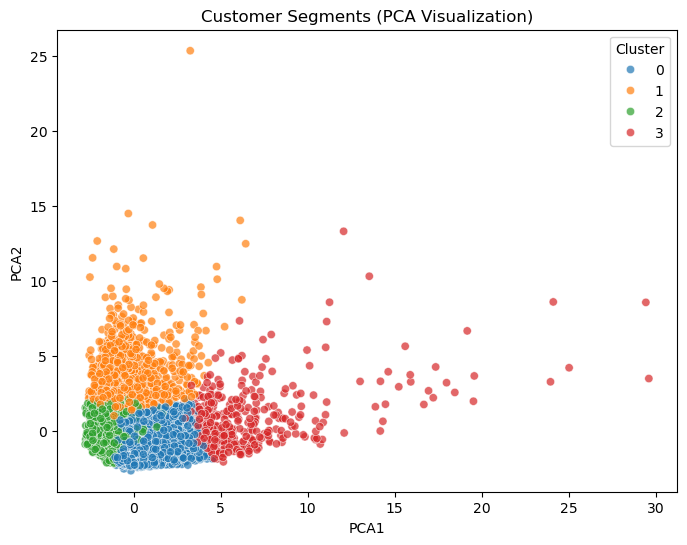

In [31]:
# Scatter Plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df_pca, alpha=0.7)
plt.title("Customer Segments (PCA Visualization)")
plt.legend(title='Cluster')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Infrences:</font></h2>

__1. Distinct Segments Exist:__
The clusters are reasonably separated → your customer base has __different behavioral or demographic groups.__

__2. Cluster Characteristics (visual only):__
* Cluster 0 (blue, bottom-left): Compact, dense group → these customers are quite similar to each other.
* Cluster 1 (orange, upper-left): More spread vertically → more variation in this group.
* Cluster 2 (green, lower-left): Small and tight → a niche but well-defined segment.
* Cluster 3 (red, right side): Spread out widely → more diverse customers, but clearly separate from the rest.

__3. Separation Between Clusters:__
* Cluster 3 (red) is the most different from others (far to the right).
* Clusters 0, 1, and 2 overlap slightly, meaning their features are more related.

__4. Dimensionality Reduction Worked:__
Even though the original dataset may have had many features (age, income, spending habits, etc.), PCA reduced it to 2D while preserving separation between clusters.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Insights:</font></h2>

Cluster 0 (blue): Possibly low spenders with similar income.

Cluster 1 (orange): Mid-range spenders with high variability.

Cluster 2 (green): A small premium segment.

Cluster 3 (red): Distinct high-value customers or outliers with very different behavior.

# <b><span style='color:#CCCCFF'>Step 6.4.1 |</span><span style='color:purple'> t-SNE(t-Distributed Stochastic Neighbor Embedding) </span></b>

In [32]:
# t-SNE for non-linear dimensionality reduction (slower but sometimes clearer clusters):
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(df_scaled)

In [33]:
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = df['Cluster']

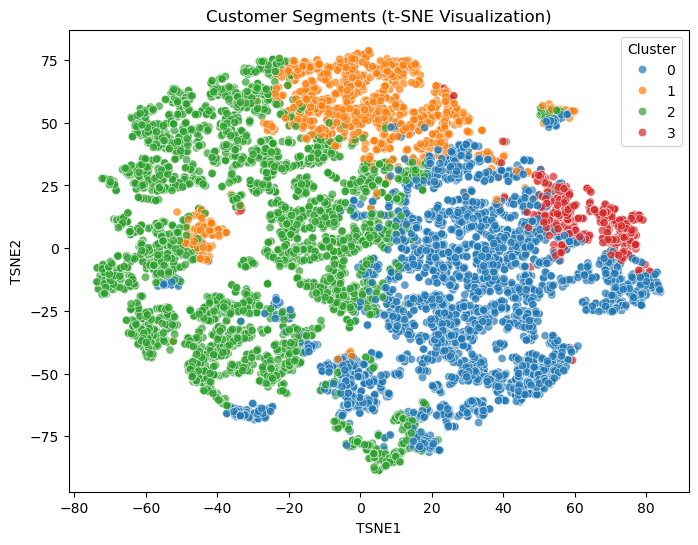

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette='tab10',
    data=df_tsne,
    alpha=0.7
)
plt.title('Customer Segments (t-SNE Visualization)')
plt.legend(title='Cluster')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Infrences:</font></h2>

__1. Better Cluster Separation than PCA:__
Compared to the PCA plot you shared earlier, here the clusters (especially red and orange) appear more __compact and distinct.__ This shows t-SNE’s strength at preserving __local structure.__

__2. Cluster Observations:__
* __Cluster 0 (blue):__ Largest group, spread across the middle/right part → may represent the majority “mainstream” customer base.
* __Cluster 1 (orange):__ Mostly at the top → well-defined, dense, and separate from others.
* __Cluster 2 (green):__ Large but with several sub-groups → this segment might contain different customer sub-patterns inside it.
* __Cluster 3 (red):__ Small, tight group on the far right → clearly distinct, possibly a special customer type (e.g., high spenders or outliers).

__3. Overlaps:__
* Some overlap between __Cluster 0 (blue)__ and __Cluster 2 (green)__ → these groups might share similar features.
* Clusters 1 (orange) and 3 (red) are much cleaner and more isolated.

__4. Substructure within clusters:__
* t-SNE often reveals __subclusters__ (mini-groups within green and blue). This suggests further segmentation may be possible if you increase the number of clusters.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Insights:</font></h2>

Cluster 3 (red): Potentially VIP customers → very distinct from others.

Cluster 1 (orange): Another well-defined niche segment (could be younger buyers, regional customers, etc.).

Cluster 0 & 2 (blue & green): Larger, more mixed groups → may need additional segmentation or different marketing approaches.

# <b><span style='color:#CCCCFF'>Step 6.4.2 |</span><span style='color:purple'> CLUSTER PROFILING</span></b>

In [35]:
# Compute summary stats per cluster
cluster_summary = df.groupby('Cluster').agg({
    'BALANCE': ['mean', 'median'],
    'PURCHASES': ['mean', 'median'],
    'ONEOFF_PURCHASES': 'mean',
    'INSTALLMENTS_PURCHASES': 'mean',
    'CASH_ADVANCE': 'mean',
    'CREDIT_LIMIT': 'mean',
    'PAYMENTS': 'mean',
    'MINIMUM_PAYMENTS': 'mean',
    'PRC_FULL_PAYMENT': 'mean'
})

In [36]:
print("=== Cluster Summary (Key Features) ===")
print(cluster_summary)

=== Cluster Summary (Key Features) ===
             BALANCE                 PURCHASES          ONEOFF_PURCHASES  \
                mean       median         mean   median             mean   
Cluster                                                                    
0         894.768927   337.224040  1236.263333   892.15       593.995933   
1        4602.449658  4274.488095   501.862982    85.54       320.188797   
2        1012.745945   764.575875   270.213240    79.22       210.016021   
3        3551.153761  2492.726282  7681.620098  5848.55      5095.878826   

        INSTALLMENTS_PURCHASES CASH_ADVANCE CREDIT_LIMIT     PAYMENTS  \
                          mean         mean         mean         mean   
Cluster                                                                 
0                   642.541696   209.816318  4214.013741  1331.325429   
1                   181.759123  4521.509581  7546.160857  3484.054216   
2                    60.464108   597.051145  3278.569076   975.

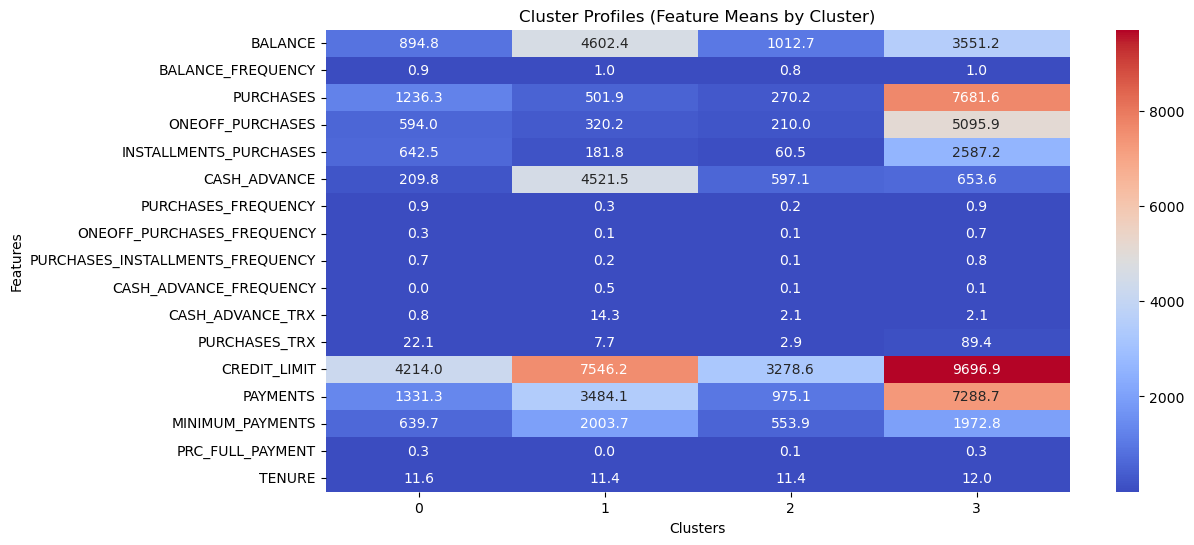

In [37]:
# Normalize data for heatmap visualization
cluster_profile = df.groupby('Cluster').mean()

plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile.T, cmap="coolwarm", annot=True, cbar=True, fmt=".1f")
plt.title("Cluster Profiles (Feature Means by Cluster)")
plt.ylabel("Features")
plt.xlabel("Clusters")
plt.show()

In [38]:
# Count customers per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\n=== Customers per Cluster ===")
print(cluster_counts)


=== Customers per Cluster ===
Cluster
0    3366
1    1197
2    3978
3     409
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Cluster Interpretations:</font></h2>


🟦 Cluster 0 – Low Activity / Dormant Customers

* Balance, Purchases, Payments, Cash Advances → very low.
* Often keep accounts open but don’t use them much.
* Bank earns little from them → may need activation campaigns (offers, reminders).

🟩 Cluster 1 – One-off Luxury Spenders

* High One-off Purchases but relatively low installment purchases.
* Make large payments and often settle balances (higher PRC_FULL_PAYMENT).
* Tend to be low-risk, high-value — use cards for convenience or big-ticket items.
* Bank should retain with loyalty programs (cashback, rewards).

🟧 Cluster 2 – Cash Advance Reliant / Risky Customers

* High Cash Advances and many related transactions.
* Low percentage of full payment, rely on revolving credit.
* Carry higher balances but pay back less consistently.
* This group represents higher credit risk → may default.
* Bank may monitor closely, adjust credit limits or encourage responsible repayment.

🟥 Cluster 3 – High Value / VIP Customers

* High Balance, Purchases, Credit Limits, and Payments.
* Use both one-off and installment purchases, showing diverse usage.
* Pay back significant amounts, but may not always pay in full.
* This group generates the most revenue (transaction fees + interest).
* Bank should reward with premium offers to maintain loyalty.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Key Business Insights:</font></h2>

1. You can divide customers into `inactive, profitable, risky, and VIP segments.`
   
2. Marketing & credit strategies should be `tailored per cluster:`
* Cluster 0: Boost engagement.
* Cluster 1: Rewards for high spenders.
* Cluster 2: Risk control + repayment education.
* Cluster 3: Exclusive benefits for VIPs.

3. This segmentation can drive `personalized campaigns` → higher retention and lower risk.

# <b><span style='color:#CCCCFF'>Step 6.5 |</span><span style='color:purple'> DBSCAN (Density-Based Spatial Clustering of Applications with Noise) </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Unlike KMeans (which forces clusters of similar size/shape), DBSCAN:

* Detects arbitrary-shaped clusters.
* Can identify outliers (noise points).
* Doesn’t require you to pre-specify the number of clusters.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

Let’s try clustering with DBSCAN to explore density-based patterns.

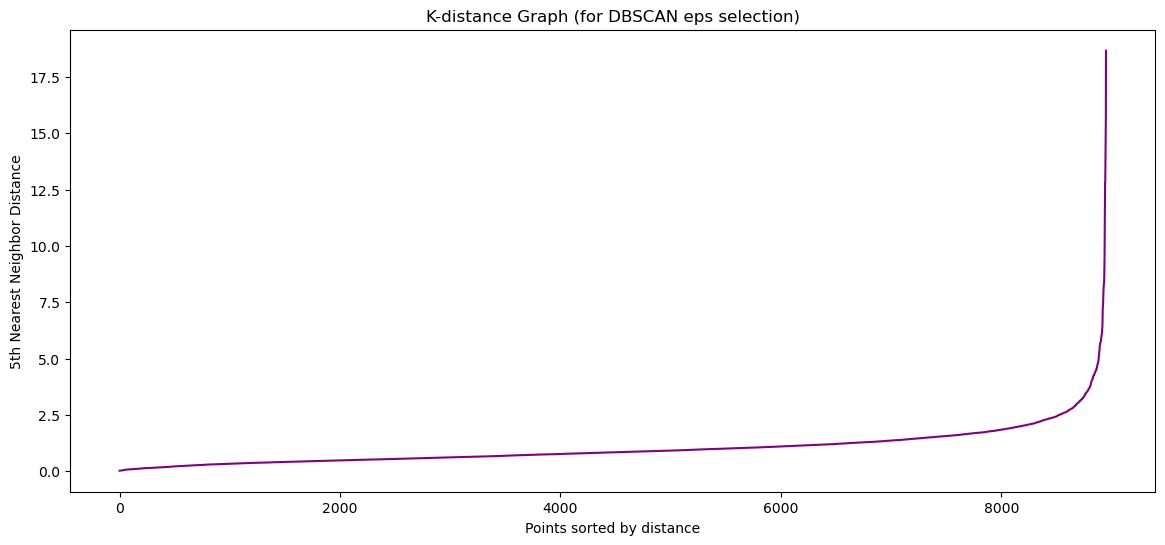

In [39]:
# k-distance plot to find epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, 3])      # 5th nearest neighbor distance
plt.plot(distances)
plt.title('K-distance Graph (for DBSCAN eps selection)')
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Infrences:</font></h2>

__1. The “elbow point” is key:__
* The point where the curve makes a sharp bend is the best choice for ε (epsilon) in DBSCAN.
* Below this value → points are in dense neighborhoods (clusters).
* Above this value → points are outliers or far away.

__2. In this graph:__
* The curve is flat for most points (< 2).
* Around distance = 2–3, it starts to bend upward.
* After ~3, the distances rise sharply → these are likely noise points.
  
👉 So, a good ε value for DBSCAN is around 2–3.

__3. Why it matters:__
* Too small ε → too many points marked as noise.
* Too large ε → clusters merge, losing structure.
* The elbow helps find a balance.

In [40]:
# Fit DBSCAN
# (adjust eps after inspecting plot, e.g. 1.5)
db = DBSCAN(eps=1.5, min_samples=5).fit(df_scaled)
df['DBSCAN_Cluster'] = db.labels_

In [41]:
# Analyze results
print("Cluster counts:\n", df['DBSCAN_Cluster'].value_counts())

# -1 means "Noise" (outliers detected)
print(f"Number of noise points: {(df['DBSCAN_Cluster'] == -1).sum()}")

Cluster counts:
 DBSCAN_Cluster
 0    7606
-1    1320
 5       7
 2       5
 4       5
 3       4
 1       3
Name: count, dtype: int64
Number of noise points: 1320


In [42]:
# Visualization
df_pca['DBSCAN_Cluster'] =  df['DBSCAN_Cluster']

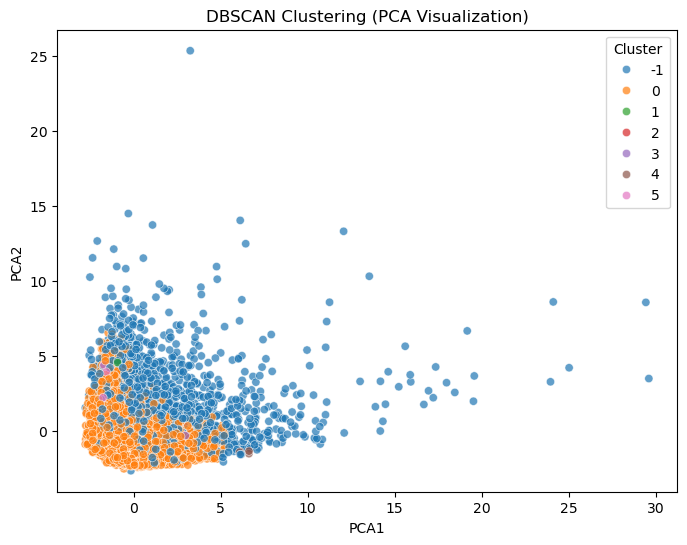

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10', data=df_pca, alpha=0.7)
plt.title("DBSCAN Clustering (PCA Visualization)")
plt.legend(title='Cluster')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Infrences:</font></h2>

__1. Most points are labeled as -1 (blue = noise):__
* DBSCAN is marking a large portion of data as outliers.
* This suggests the chosen parameters (eps, minPts) may be too strict, so only dense pockets are considered valid clusters.

__2. Few actual clusters (orange = cluster 0, and maybe small others):__
* A small, dense cluster (orange) was detected.
* Other cluster IDs (1, 2, 3, 4, 5) don’t seem to appear much, meaning clustering wasn’t effective.

__3. Cluster separability:__
* PCA shows that while the dense group (orange) is well-captured, DBSCAN is struggling to recognize other structures.
* This usually happens if the data has varying densities, since DBSCAN assumes similar density for all clusters.

__4. Comparison with K-Means/t-SNE:__
* Earlier (in PCA/t-SNE cluster visualizations), I had clearer cluster separation.
* DBSCAN here is too sensitive and is over-classifying points as noise.

<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

The main difference: DBSCAN may find fewer, more natural clusters and identify outlier customers who don’t fit into any segment (important for fraud/risk detection).

# <b><span style='color:#CCCCFF'>Step 6.5.1 |</span><span style='color:purple'> DBSCAN CLUSTER PROFILING</span></b>

In [44]:
# Group by DBSCAN cluster (excluding noise for profiling)
dbscan_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').agg({
    'BALANCE': ['mean', 'median'],
    'PURCHASES': ['mean', 'median'],
    'ONEOFF_PURCHASES': 'mean',
    'INSTALLMENTS_PURCHASES': 'mean',
    'CASH_ADVANCE': 'mean',
    'CREDIT_LIMIT': 'mean',
    'PAYMENTS': 'mean',
    'MINIMUM_PAYMENTS': 'mean',
    'PRC_FULL_PAYMENT': 'mean'
})

In [45]:
print("=== DBSCAN Cluster Summary (Key Features) ===")
print(dbscan_summary)

=== DBSCAN Cluster Summary (Key Features) ===
                    BALANCE                 PURCHASES           \
                       mean       median         mean   median   
DBSCAN_Cluster                                                   
0               1214.785040   694.558344   633.059719   297.21   
1               2439.037295  2682.407264   421.740000   328.61   
2               4702.746614  4659.388091  1619.914000  1754.19   
3               4394.666202  4641.947511  4038.865000  4153.19   
4                591.821026   592.416944  5993.634000  5819.46   
5               5204.854285  5471.186593     0.000000     0.00   

               ONEOFF_PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE  \
                           mean                   mean         mean   
DBSCAN_Cluster                                                        
0                    345.149306             288.181860   627.076944   
1                    394.853333              26.886667  6703.539956   
2   

In [46]:
# Customers per cluster (including noise)
print("\n=== Customers per DBSCAN Cluster ===")
print(df['DBSCAN_Cluster'].value_counts().sort_index())


=== Customers per DBSCAN Cluster ===
DBSCAN_Cluster
-1    1320
 0    7606
 1       3
 2       5
 3       4
 4       5
 5       7
Name: count, dtype: int64


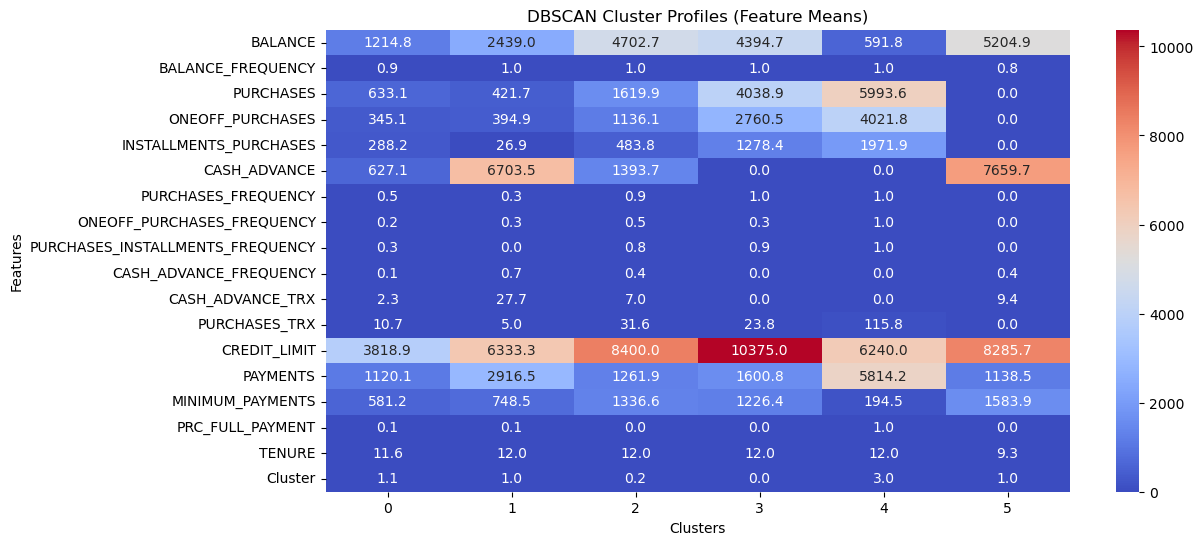

In [47]:
# Heatmap of cluster profiles
dbscan_profile = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()

plt.figure(figsize=(12,6))
sns.heatmap(dbscan_profile.T, cmap="coolwarm", annot=True, cbar=True, fmt=".1f")
plt.title("DBSCAN Cluster Profiles (Feature Means)")
plt.ylabel("Features")
plt.xlabel("Clusters")
plt.show()

In [48]:
# Analyze noise separately
noise = df[df['DBSCAN_Cluster'] == -1]
print(f"\nNoise Points: {len(noise)}")
print("Average Profile of Noise:")
print(noise.mean(numeric_only=True))


Noise Points: 1320
Average Profile of Noise:
BALANCE                             3541.357649
BALANCE_FREQUENCY                      0.915190
PURCHASES                           3112.229258
ONEOFF_PURCHASES                    1999.312871
INSTALLMENTS_PURCHASES              1113.387598
CASH_ADVANCE                        2962.615327
PURCHASES_FREQUENCY                    0.654949
ONEOFF_PURCHASES_FREQUENCY             0.388036
PURCHASES_INSTALLMENTS_FREQUENCY       0.485971
CASH_ADVANCE_FREQUENCY                 0.281891
CASH_ADVANCE_TRX                       8.821970
PURCHASES_TRX                         37.212121
CREDIT_LIMIT                        8323.727273
PAYMENTS                            5252.906876
MINIMUM_PAYMENTS                    2359.968535
PRC_FULL_PAYMENT                       0.184770
TENURE                                11.209091
Cluster                                1.377273
DBSCAN_Cluster                        -1.000000
dtype: float64


<div style="border-radius:10px; padding: 15px; background-color: #CCCCFF; font-size:115%; text-align:left">

<h2 align="left"><font color=purple>Interpretations:</font></h2>

* DBSCAN might give fewer clusters than KMeans.

* Noise points (-1) = customers who don’t fit normal behavior → possible fraudulent or extreme spending patterns.

* Remaining clusters should show low activity, high spenders, cash-advance heavy users, or VIPs, but with tighter, more natural groupings.

# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Conclusion</p>

# <b><span style='color:#CCCCFF'>Step 7.1 |</span><span style='color:purple'> COMPARISON: K-Means vs DBSCAN </span></b>

In [49]:
# Cluster counts
print("=== Cluster Counts ===")
print("KMeans:", df['Cluster'].value_counts().sort_index().to_dict())
print("DBSCAN:", df['DBSCAN_Cluster'].value_counts().sort_index().to_dict())

=== Cluster Counts ===
KMeans: {0: 3366, 1: 1197, 2: 3978, 3: 409}
DBSCAN: {-1: 1320, 0: 7606, 1: 3, 2: 5, 3: 4, 4: 5, 5: 7}


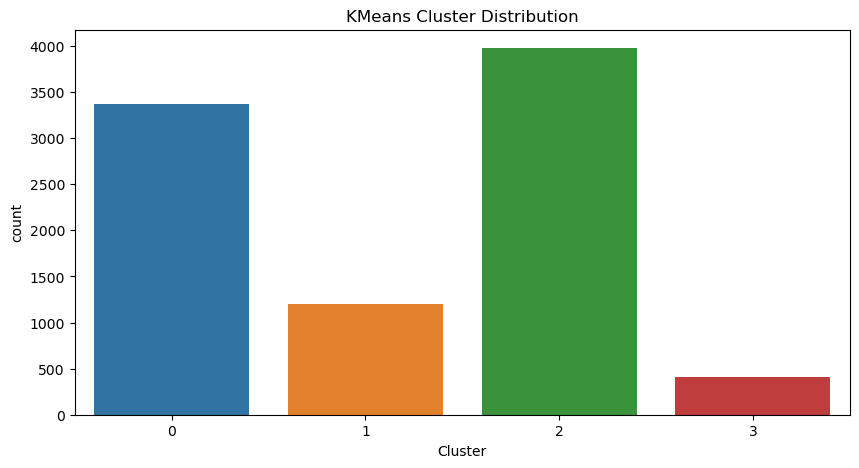

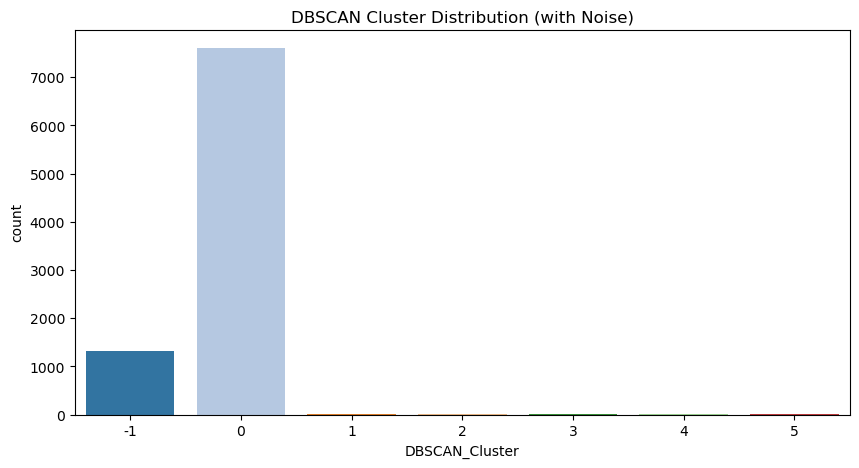

In [50]:
# Cluster sizes (bar plot)
plt.figure(figsize=(10,5))
sns.countplot(x='Cluster', data=df, palette='tab10')
plt.title("KMeans Cluster Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='DBSCAN_Cluster', data=df, palette='tab20')
plt.title("DBSCAN Cluster Distribution (with Noise)")
plt.show()

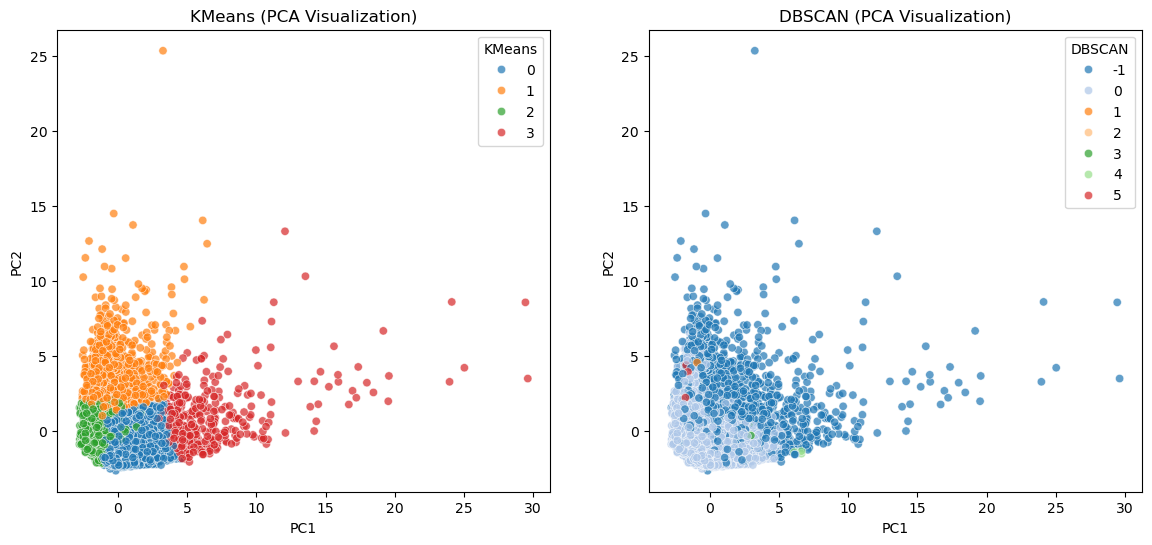

In [51]:
# PCA side-by-side visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1','PC2'])
df_pca['KMeans'] = df['Cluster']
df_pca['DBSCAN'] = df['DBSCAN_Cluster']

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(x='PC1', y='PC2', hue='KMeans', palette='tab10', data=df_pca, alpha=0.7, ax=axes[0])
axes[0].set_title("KMeans (PCA Visualization)")

sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN', palette='tab20', data=df_pca, alpha=0.7, ax=axes[1])
axes[1].set_title("DBSCAN (PCA Visualization)")

plt.show()

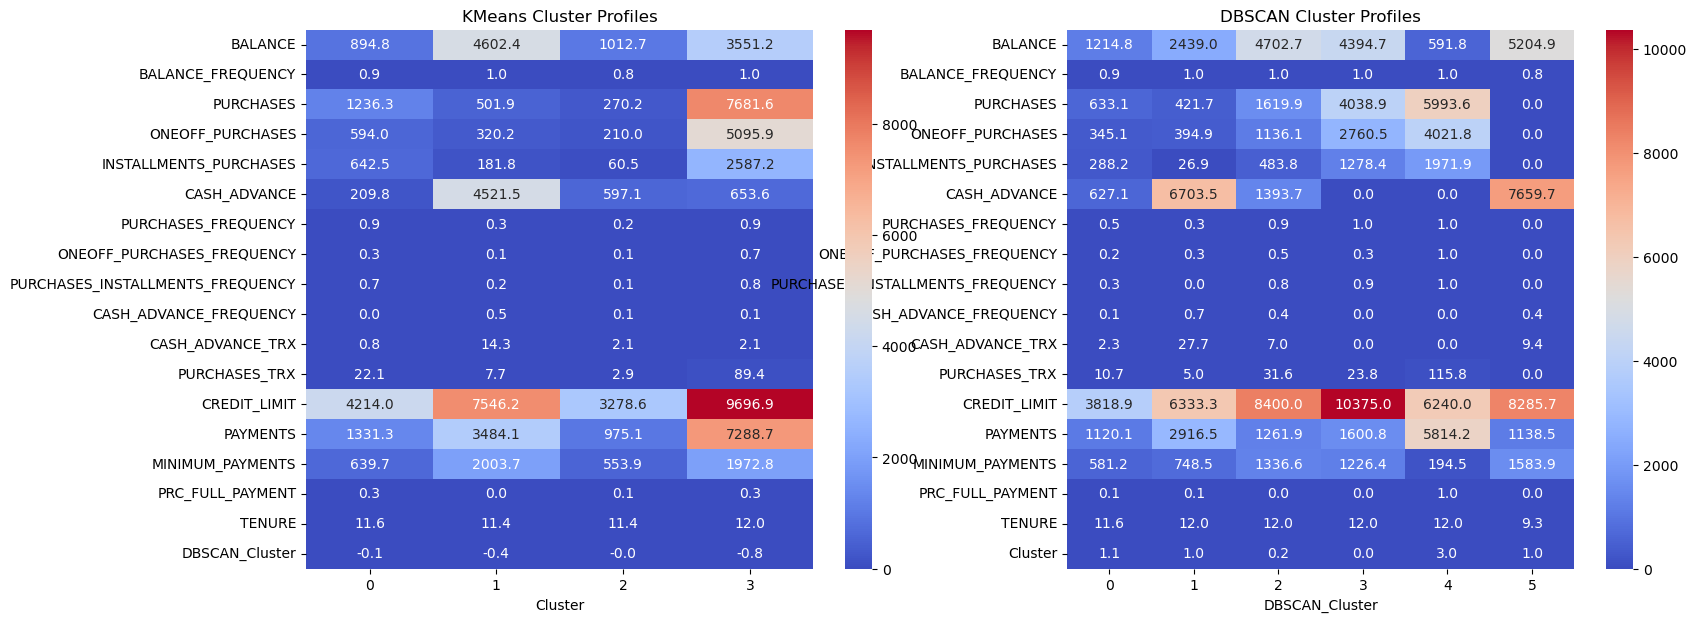

In [52]:
# Profiling comparison (feature means)
kmeans_profile = df.groupby('Cluster').mean()
dbscan_profile = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()

fig, axes = plt.subplots(1, 2, figsize=(18,7))
sns.heatmap(kmeans_profile.T, cmap="coolwarm", annot=True, cbar=True, fmt=".1f", ax=axes[0])
axes[0].set_title("KMeans Cluster Profiles")

sns.heatmap(dbscan_profile.T, cmap="coolwarm", annot=True, cbar=True, fmt=".1f", ax=axes[1])
axes[1].set_title("DBSCAN Cluster Profiles")
plt.show()

# <b><span style='color:#CCCCFF'>Step 7.2 |</span><span style='color:purple'> Business Insights from Clustering </span></b>

## KMeans Segmentation (4 clusters example)

1. `Cluster 0 – Low Activity / Dormant Customers`

* Very low balances, purchases, and payments.
* Customers rarely use their cards → generate little revenue.
* `Business Insight`: Target with `activation campaigns`, incentives, or small credit boosts to encourage usage.

2. `Cluster 1 – One-off Luxury Spenders`

* High one-off purchases, high payments, often settle full balances.
* Reliable customers with low risk, strong repayment habits.
* `Business Insight`: Offer `cashback on luxury categories`, travel perks, or loyalty rewards to retain them.

3. `Cluster 2 – Cash Advance Dependent / Risky Customers`

* High `cash advance usage`, low percentage of full payment.
* Carry balances and generate high interest/fees → risk of default.
* `Business Insight`: Monitor closely, `risk control policies`, financial education, or restructure repayment plans.

4. `Cluster 3 – High Value / VIP Customers`

* High balances, large purchases, big credit limits, and significant repayments.
* Use cards across categories (installments + one-off).
* `Business Insight`: These are `priority clients` — reward with `exclusive benefits`, higher credit, and premium services.

## DBSCAN Segmentation

* DBSCAN identifies natural clusters + outliers (-1).
* Compared to KMeans:
    - It may produce fewer clusters (e.g., 2–3 instead of 4).
    - It isolates noise points = outliers.

Example Outcome:

1. `Cluster A – Mainstream Customers`
* Average spending & repayment habits.
* `Business Insight`: Good base for upselling additional products (insurance, loans, co-branded cards).

2. `Cluster B – High Spending / High Limit Customers`
* Large balances, high purchases, repay regularly.
* `Business Insight`: Same as KMeans VIPs → focus on `retention & cross-selling` (investment products, premium cards).

3. `Cluster C – Risky Customers (cash-advance heavy)`
* Heavy reliance on cash advances, low repayment ratios.
* `Business Insight`: Flag for `credit risk monitoring`, reduce credit exposure, or offer structured repayment plans.

4. `Noise (-1) – Outliers / Unusual Behavior`
* Customers with `very abnormal spending/repayment patterns.`
* Could be fraudulent, very high-value, or very risky clients.`
* `Business Insight`: Investigate individually — may require `fraud detection systems` or personalized credit policies.

<h2 align="left"><font color='purple'>Best Regards!</font></h2>